In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import datetime as datetime
%matplotlib inline

In [2]:
edu=pd.read_csv("fiuba_1_postulantes_educacion.csv")
edu.head(5)

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [3]:
gen=pd.read_csv("fiuba_2_postulantes_genero_y_edad.csv")
gen.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [4]:
vis=pd.read_csv("fiuba_3_vistas.csv")
vis.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [5]:
post=pd.read_csv("fiuba_4_postulaciones.csv")
post.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [6]:
aon=pd.read_csv("fiuba_5_avisos_online.csv")
aon.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [7]:
ade=pd.read_csv("fiuba_6_avisos_detalle.csv")
ade.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


# Analizar la distribución de postulaciones a avisos según la fecha, dia del mes, dia de la semana, etc.
#Algunas de las preguntas que podrían plantearse son: Se recibe un volumen de postulaciones similar cualquier dia de
    la semana? Existen variaciones según el mes del año, o aun dentro del mes? Etc. 
Averiguar cuál es área de trabajo (nombre_area) sobre la cual se concentra mayor cantidad de ofertas laborales, 
y dentro de esta área, cuál es la zona (nombre_zona) en donde hay mas demanda.  


In [8]:
#Se recibe un volumen de postulaciones similar cualquier dia de la semana
post.dropna()
post.fechapostulacion= pd.to_datetime(post.fechapostulacion, errors='coerce')

post["month"]=post.fechapostulacion.dt.month
post["day"]=post.fechapostulacion.dt.day
post["weekday"]=post.fechapostulacion.dt.weekday_name
post["weekday_"]=post.fechapostulacion.dt.weekday
post["date"]=post.fechapostulacion.dt.date
post.head()

,idaviso,idpostulante,fechapostulacion,month,day,weekday,weekday_,date
0,1112257047,NM5M,2018-01-15 16:22:34,1,15,Monday,0,2018-01-15
1,1111920714,NM5M,2018-02-06 09:04:50,2,6,Tuesday,1,2018-02-06
2,1112346945,NM5M,2018-02-22 09:04:47,2,22,Thursday,3,2018-02-22
3,1112345547,NM5M,2018-02-22 09:04:59,2,22,Thursday,3,2018-02-22
4,1112237522,5awk,2018-01-25 18:55:03,1,25,Thursday,3,2018-01-25


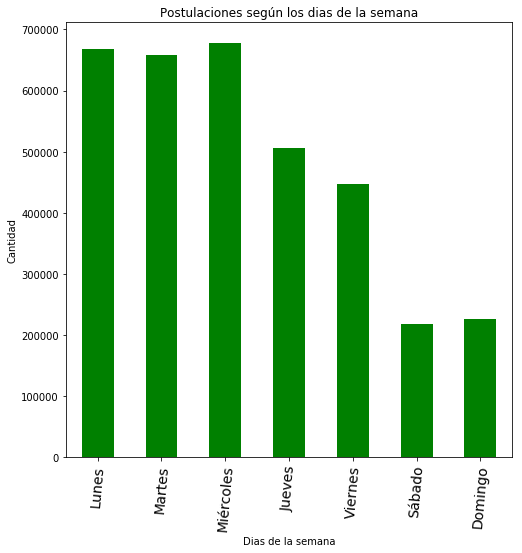

In [52]:
#La cantidad de postulaciones que se recibe por semana
Dia_semana=post.loc[:, ["weekday_", "idaviso"]].groupby("weekday_").count()
Dia_semana.plot(kind='bar',figsize=(8,8),rot=85,title='Postulaciones según los dias de la semana', color="green", legend=False);
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Dias de la semana');
ax.set_xticklabels([r'Lunes', r'Martes', r'Miércoles', r'Jueves', r'Viernes', r"Sábado", r"Domingo"], fontsize=14);




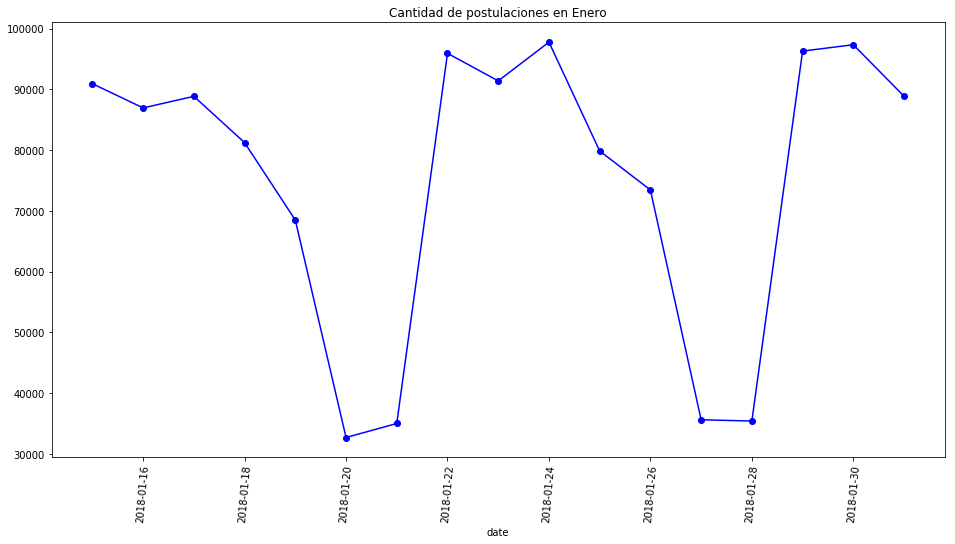

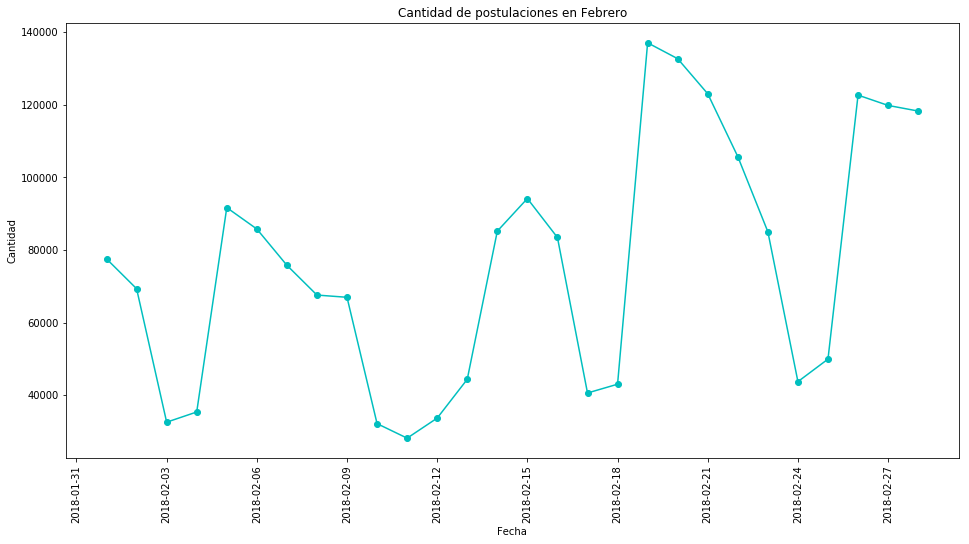

In [10]:
# Como no tenemos el mes de enero completo, vamos a analizar como se distribuye durante el mes, ya que en promedio dan la misma cantidad de postulaciones
post["date"].value_counts()
enero=post[post["month"]==1].loc[:, ["date", "idaviso"]].groupby("date").count()
febrero=post[post["month"]==2].loc[:, ["date", "idaviso"]].groupby("date").count()
enero.plot(figsize=(16, 8), rot=85,title='Cantidad de postulaciones en Enero', color="b", legend=False, marker="o")
febrero.plot(figsize=(16,8),rot=90,title='Cantidad de postulaciones en Febrero', color="c", marker="o", legend= False)
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Fecha');

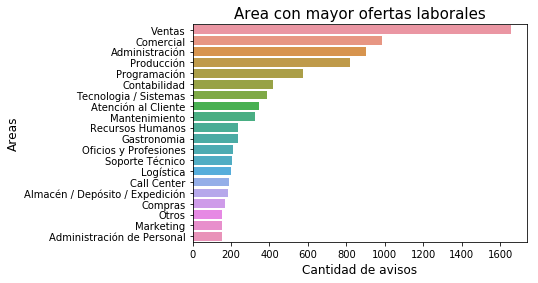

In [81]:
#Averiguar cuál es área de trabajo (nombre_area) sobre la cual se concentra mayor cantidad de ofertas laborales,
#y dentro de esta área, cuál es la zona (nombre_zona) en donde hay mas demanda. 
#idaviso 	idpais 	titulo 	descripcion 	nombre_zona 	ciudad 	mapacalle 	tipo_de_trabajo 	nivel_laboral 	nombre_area 	denominacion_empresa

g = sns.barplot(x=ade["nombre_area"].value_counts().head(20), y=ade["nombre_area"].value_counts().head(20).index, orient='h')
g.set_title("Area con mayor ofertas laborales", fontsize=15)
g.set_xlabel("Cantidad de avisos", fontsize=12)
g.set_ylabel("Areas", fontsize=12);


In [12]:
#Vamos a comparar estas áreas ofrecidas con las áreas con mayor demanda (postulaciones)
postulaciones_por_area = pd.merge(post, ade, on='idaviso')

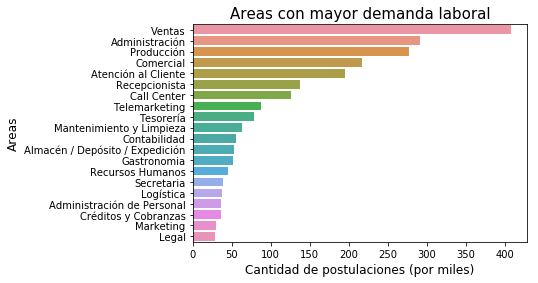

In [13]:
g = sns.barplot(x=postulaciones_por_area["nombre_area"].value_counts().head(20) / 1000, y=postulaciones_por_area["nombre_area"].value_counts().head(20).index, orient='h')
g.set_title("Areas con mayor demanda laboral", fontsize=15)
g.set_xlabel("Cantidad de postulaciones (por miles)", fontsize=12)
g.set_ylabel("Areas", fontsize=12);

Comparando ambos gráficos, podemos ver que las cuatro áreas más solicitadas (Ventas, Administración, Producción y Comercial) siguen la misma proporción que la cantidad de avisos disponibles (obteniendo entre 200 y 300 postulaciones por aviso)
Como dato interesante, no encontramos entre las primeras 20 áreas más solicitadas áreas referidas a programación o tecnología, considerando que son de las áreas con mayor oferta laboral.

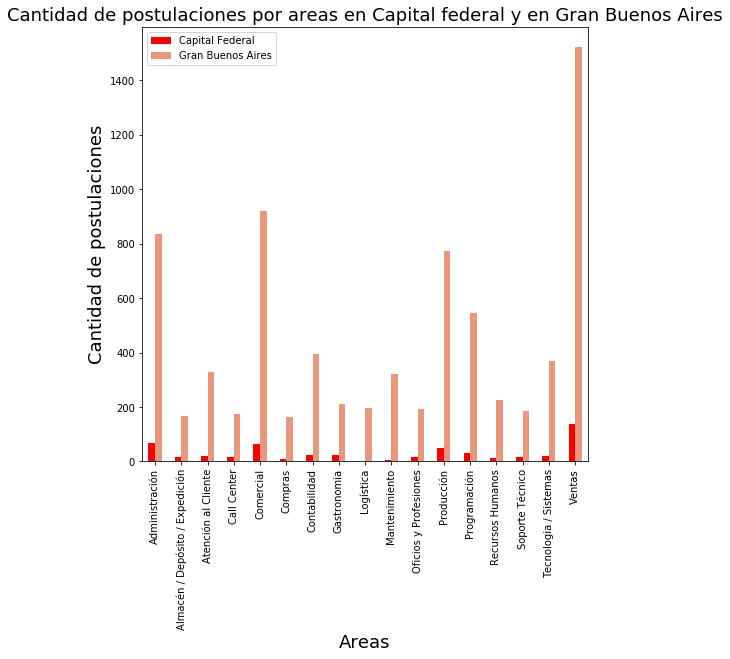

In [74]:

areas = ade.loc[:, ["nombre_area", "nombre_zona", "idaviso", "idpais"]]
capital = areas.loc[areas['nombre_zona'] == 'Capital Federal',('nombre_area', 'idaviso')].groupby('nombre_area').agg(np.size)
provincia = areas.loc[areas['nombre_zona'] == 'Gran Buenos Aires',('nombre_area', 'idpais')].groupby('nombre_area').agg(np.size)
ambos=pd.concat([capital, provincia],axis=1).dropna()
ambos=ambos.rename(columns={"idaviso":"Capital Federal", "idpais":"Gran Buenos Aires"})



ambos[ambos["Gran Buenos Aires"]>=150].plot(kind="bar", figsize=(8,8), color=["r","darksalmon"] );

plt.xlabel('Areas', fontsize=18)
plt.ylabel("Cantidad de postulaciones",fontsize=18)
plt.title("Cantidad de postulaciones por areas en Capital federal y en Gran Buenos Aires",fontsize=18);


In [15]:
#transformamos a datetime las columnas que necesiten serlo
gen.fechanacimiento = pd.to_datetime(gen.fechanacimiento, format='%Y-%m-%d', errors='coerce')
vis.timestamp = pd.to_datetime(vis.timestamp)

In [16]:
#agregamos la columna de edad para el rdd de postulantes_genero_y_edad
now = pd.Timestamp(datetime.datetime.now())
gen['edad'] = (now - gen['fechanacimiento']).astype('<m8[Y]')

<h1>Analizar la distribución de vistas a avisos según el género, edad y nivel de estudio</h1>

Según los datos suministrados que pertenecen al día 23/02/2018

In [17]:
#Analizamos la distribucion por género de las vistas

#SELECT
#count(sexo)
#FROM vis
#INNER JOIN gen ON vis.idpostulante = gen.idpostulante
#GROUP BY sexo

vistas_por_genero = pd.merge(vis, gen, on='idpostulante').groupby('sexo').size()
vistas_por_genero

sexo
FEM           537492
MASC          402319
NO_DECLARA     22086
dtype: int64

Text(0,0.5,'Cantidad de vistas')

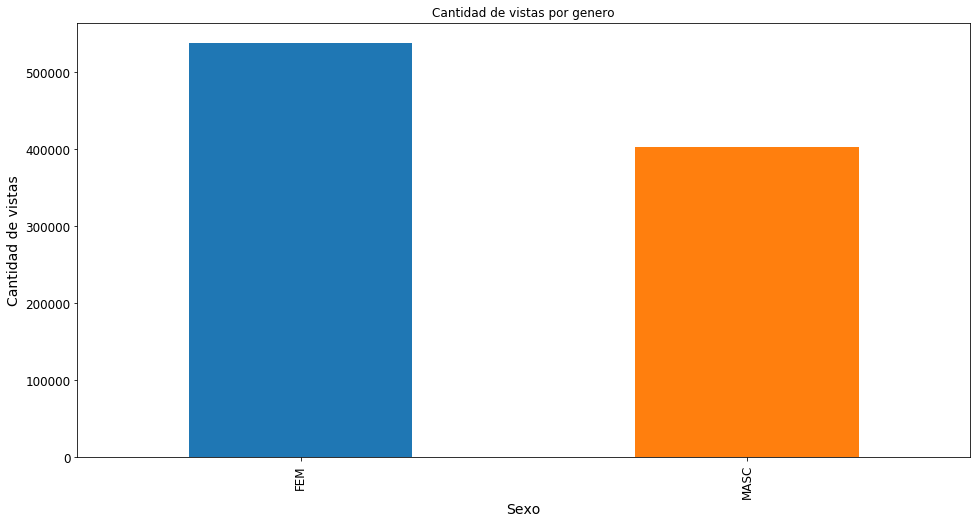

In [77]:
vistas_por_genero[:2].plot('bar',figsize=(16,8),title='Cantidad de vistas por genero', fontsize=12);
plt.xlabel('Sexo', fontsize=14)
plt.ylabel("Cantidad de vistas",fontsize=14)


In [19]:
#Analizamos la distribución por edades de las vistas

#SELECT
#count(edad)
#FROM
#vis
#INNER JOIN gen ON vis.idpostulante = gen.idpostulante
#GROUP BY edad

vistas_por_edad = pd.merge(vis, gen, on='idpostulante').groupby('edad').size()

Text(0,0.5,'Cantidad de vistas')

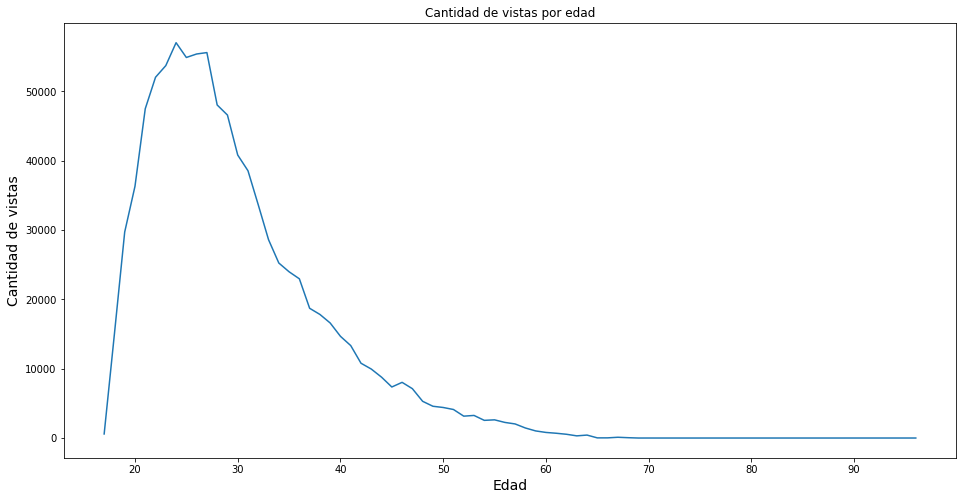

In [78]:
vistas_por_edad.plot(figsize=(16,8),title='Cantidad de vistas por edad');
plt.xlabel('Edad', fontsize=14)
plt.ylabel("Cantidad de vistas",fontsize=14)

In [21]:
#Analizamos la distribucion por niveles de educacion de las visitas.
#Pero como para un mismo porstulante existen distintos niveles de educacion vamos a quedarnos con
#el mas importante grado alcanzado

def max_nivel(row):
    if (row['nombre'] == 'Secundario') & (row['estado'] == 'Abandonado'):
        return 1
    elif (row['nombre'] == 'Secundario') & (row['estado'] == 'En Curso'):
        return 2
    elif (row['nombre'] == 'Secundario') & (row['estado'] == 'Graduado'):
        return 3
    elif (row['nombre'] == 'Terciario/Técnico') & (row['estado'] == 'Abandonado'):
        return 4
    elif (row['nombre'] == 'Terciario/Técnico') & (row['estado'] == 'En Curso'):
        return 5
    elif (row['nombre'] == 'Universitario') & (row['estado'] == 'Abandonado'):
        return 6
    elif (row['nombre'] == 'Universitario') & (row['estado'] == 'En Curso'):
        return 7
    elif (row['nombre'] == 'Terciario/Técnico') & (row['estado'] == 'Graduado'):
        return 8
    elif (row['nombre'] == 'Universitario') & (row['estado'] == 'Graduado'):
        return 9
    elif (row['nombre'] == 'Posgrado') & (row['estado'] == 'Abandonado'):
        return 10
    elif (row['nombre'] == 'Posgrado') & (row['estado'] == 'En Curso'):
        return 11
    elif (row['nombre'] == 'Posgrado') & (row['estado'] == 'Graduado'):
        return 12
    elif (row['nombre'] == 'Master') & (row['estado'] == 'Abandonado'):
        return 13
    elif (row['nombre'] == 'Master') & (row['estado'] == 'En Curso'):
        return 14
    elif (row['nombre'] == 'Master') & (row['estado'] == 'Graduado'):
        return 15
    elif (row['nombre'] == 'Doctorado') & (row['estado'] == 'Abandonado'):
        return 16
    elif (row['nombre'] == 'Doctorado') & (row['estado'] == 'En Curso'):
        return 17
    elif (row['nombre'] == 'Doctorado') & (row['estado'] == 'Graduado'):
        return 18
    else:
        return 0
    
edu['nivel_educativo'] = edu.apply(max_nivel, axis=1)

In [22]:
edu.head()

,idpostulante,nombre,estado,nivel_educativo
0,NdJl,Posgrado,En Curso,11
1,8BkL,Universitario,En Curso,7
2,1d2B,Universitario,En Curso,7
3,NPBx,Universitario,En Curso,7
4,NPBx,Master,En Curso,14


In [23]:
#Obtenemos los registros con mayor nivel educativo por postulante
idx = edu.groupby('idpostulante')['nivel_educativo'].transform(max) == edu['nivel_educativo']
edu_max_educativo = edu[idx]

In [24]:
vistas_por_max_educativo = pd.merge(vis, edu_max_educativo[edu_max_educativo['nivel_educativo'] > 0], on='idpostulante').groupby(['nivel_educativo', 'nombre', 'estado']).size()
vistas_por_max_educativo

nivel_educativo  nombre             estado    
1                Secundario         Abandonado      9574
2                Secundario         En Curso       13443
3                Secundario         Graduado      251040
4                Terciario/Técnico  Abandonado     14021
5                Terciario/Técnico  En Curso       47361
6                Universitario      Abandonado     42481
7                Universitario      En Curso      228115
8                Terciario/Técnico  Graduado      106232
9                Universitario      Graduado      152042
10               Posgrado           Abandonado      1298
11               Posgrado           En Curso        7240
12               Posgrado           Graduado       18019
13               Master             Abandonado       662
14               Master             En Curso        5598
15               Master             Graduado        7491
16               Doctorado          Abandonado        49
17               Doctorado          En Cu

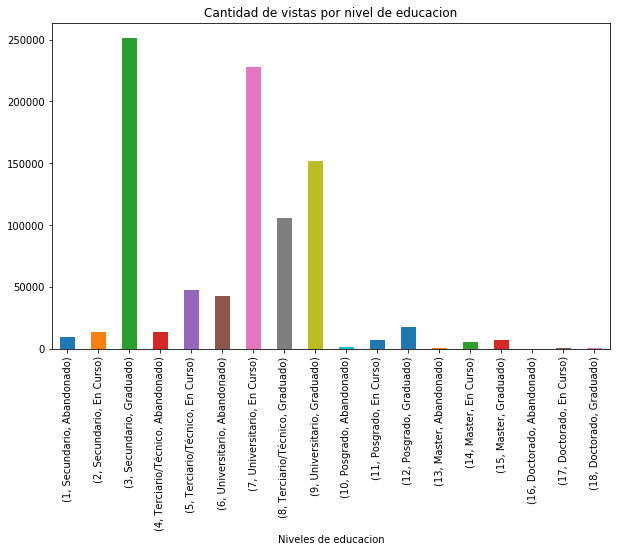

In [80]:
plt_vistas = vistas_por_max_educativo.plot('bar',figsize=(10,6),title='Cantidad de vistas por nivel de educacion')
plt_vistas.set_xlabel('Niveles de educacion');

<h1>Análisis del comportamiento de los postulantes segun el nivel educativo</h1>

In [26]:
sin_secundario = pd.merge(post, edu_max_educativo[(edu_max_educativo['nivel_educativo'] == 1) | (edu_max_educativo['nivel_educativo'] == 2)], on='idpostulante')
con_secundario = pd.merge(post, edu_max_educativo[edu_max_educativo['nivel_educativo'] == 3], on='idpostulante')
sin_univ_o_terc = pd.merge(post, edu_max_educativo[(edu_max_educativo['nivel_educativo'] == 4) | (edu_max_educativo['nivel_educativo'] == 5) | (edu_max_educativo['nivel_educativo'] == 6) | (edu_max_educativo['nivel_educativo'] == 7)], on='idpostulante')
con_univ_o_terc = pd.merge(post, edu_max_educativo[(edu_max_educativo['nivel_educativo'] == 8) | (edu_max_educativo['nivel_educativo'] == 9)], on='idpostulante')
posgrados_masters = pd.merge(post, edu_max_educativo[edu_max_educativo['nivel_educativo'] > 9], on='idpostulante')

Text(0,0.5,'Areas')

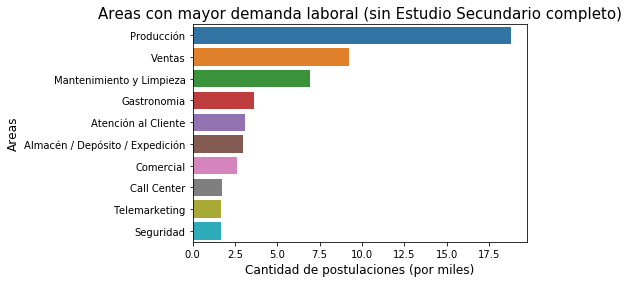

In [27]:
postulaciones_sin_secundario = pd.merge(sin_secundario, ade, on='idaviso')

g = sns.barplot(x=postulaciones_sin_secundario["nombre_area"].value_counts().head(10) / 1000, y=postulaciones_sin_secundario["nombre_area"].value_counts().head(10).index, orient='h')
g.set_title("Areas con mayor demanda laboral (sin Estudio Secundario completo)", fontsize=15)
g.set_xlabel("Cantidad de postulaciones (por miles)", fontsize=12)
g.set_ylabel("Areas", fontsize=12)

Text(0,0.5,'Areas')

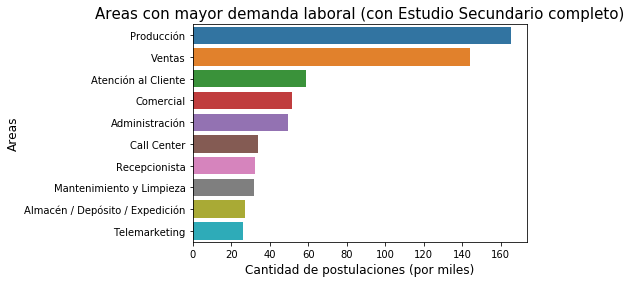

In [28]:
postulaciones_con_secundario = pd.merge(con_secundario, ade, on='idaviso')
g = sns.barplot(x=postulaciones_con_secundario["nombre_area"].value_counts().head(10) / 1000, y=postulaciones_con_secundario["nombre_area"].value_counts().head(10).index, orient='h')
g.set_title("Areas con mayor demanda laboral (con Estudio Secundario completo)", fontsize=15)
g.set_xlabel("Cantidad de postulaciones (por miles)", fontsize=12)
g.set_ylabel("Areas", fontsize=12)

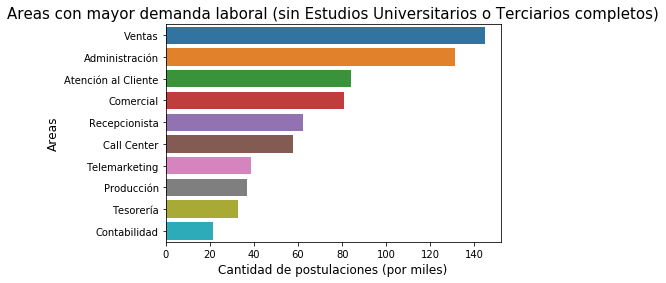

In [29]:
postulaciones_sin_univ_o_terc = pd.merge(sin_univ_o_terc, ade, on='idaviso')
g = sns.barplot(x=postulaciones_sin_univ_o_terc["nombre_area"].value_counts().head(10) / 1000, y=postulaciones_sin_univ_o_terc["nombre_area"].value_counts().head(10).index, orient='h')
g.set_title("Areas con mayor demanda laboral (sin Estudios Universitarios o Terciarios completos)", fontsize=15)
g.set_xlabel("Cantidad de postulaciones (por miles)", fontsize=12)
g.set_ylabel("Areas", fontsize=12);

Text(0,0.5,'Areas')

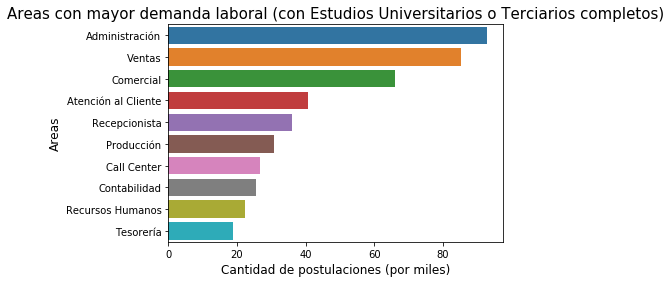

In [30]:
postulaciones_con_univ_o_terc = pd.merge(con_univ_o_terc, ade, on='idaviso')
g = sns.barplot(x=postulaciones_con_univ_o_terc["nombre_area"].value_counts().head(10) / 1000, y=postulaciones_con_univ_o_terc["nombre_area"].value_counts().head(10).index, orient='h')
g.set_title("Areas con mayor demanda laboral (con Estudios Universitarios o Terciarios completos)", fontsize=15)
g.set_xlabel("Cantidad de postulaciones (por miles)", fontsize=12)
g.set_ylabel("Areas", fontsize=12)

Text(0,0.5,'Areas')

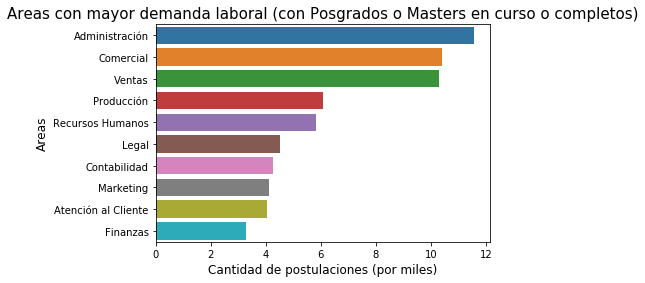

In [31]:
postulaciones_posgrados_masters = pd.merge(posgrados_masters, ade, on='idaviso')
g = sns.barplot(x=postulaciones_posgrados_masters["nombre_area"].value_counts().head(10) / 1000, y=postulaciones_posgrados_masters["nombre_area"].value_counts().head(10).index, orient='h')
g.set_title("Areas con mayor demanda laboral (con Posgrados o Masters en curso o completos)", fontsize=15)
g.set_xlabel("Cantidad de postulaciones (por miles)", fontsize=12)
g.set_ylabel("Areas", fontsize=12)

Podemos ver cómo los postulantes, según su nivel de estudio, van postulandose en avisos de menor (como limpieza, gastronomía y seguridad) a mayor preparación (como legales, marketing y finanzas), mientras que administración, comercial, ventas y producción se mantienen, aunque con distintos niveles de cargos y exigencias

<h1>Análisis del comportamiento de los postulantes segun su género</h1>

In [32]:
masculinos = pd.merge(post, gen[gen['sexo'] == 'MASC'], on='idpostulante')
femeninos = pd.merge(post, gen[gen['sexo'] == 'FEM'], on='idpostulante')

Text(0,0.5,'Areas')

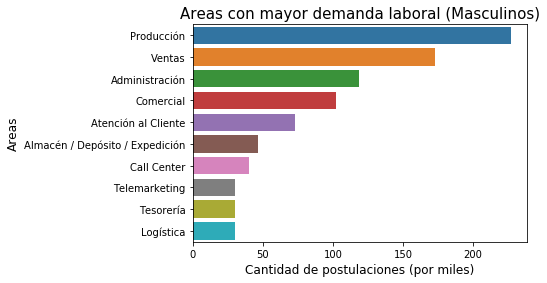

In [33]:
postulaciones_masculinos = pd.merge(masculinos, ade, on='idaviso')
g = sns.barplot(x=postulaciones_masculinos["nombre_area"].value_counts().head(10) / 1000, y=postulaciones_masculinos["nombre_area"].value_counts().head(10).index, orient='h')
g.set_title("Areas con mayor demanda laboral (Masculinos)", fontsize=15)
g.set_xlabel("Cantidad de postulaciones (por miles)", fontsize=12)
g.set_ylabel("Areas", fontsize=12)

Text(0,0.5,'Areas')

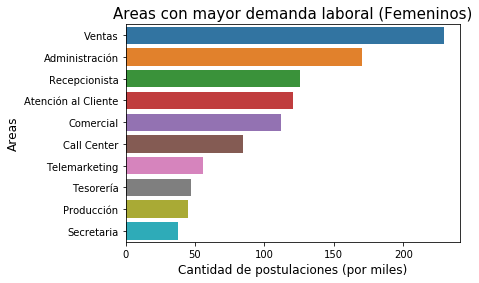

In [34]:
postulaciones_femeninos = pd.merge(femeninos, ade, on='idaviso')
g = sns.barplot(x=postulaciones_femeninos["nombre_area"].value_counts().head(10) / 1000, y=postulaciones_femeninos["nombre_area"].value_counts().head(10).index, orient='h')
g.set_title("Areas con mayor demanda laboral (Femeninos)", fontsize=15)
g.set_xlabel("Cantidad de postulaciones (por miles)", fontsize=12)
g.set_ylabel("Areas", fontsize=12)

<h1>Comportamiento de los visitantes según su edad</h1>

Nos interesa ver que áreas son las que buscan más a los jóvenes, con el fin de poder abarcar mayor esfuerzo en la búsqueda de nuevos avisos para dichas áreas y captar mayor interés en el sitio por parte de la población jóven

Es una estimación, ya que las vistas que disponemos sólo abarcan el día 23/02/2018

In [35]:
rango_1 = pd.merge(vis, gen[gen['edad'] < 20], on='idpostulante')
rango_2 = pd.merge(vis, gen[(gen['edad'] >= 20) & (gen['edad'] < 25)], on='idpostulante')
rango_3 = pd.merge(vis, gen[(gen['edad'] >= 25) & (gen['edad'] < 30)], on='idpostulante')
rango_4 = pd.merge(vis, gen[(gen['edad'] >= 30) & (gen['edad'] < 40)], on='idpostulante')

Text(0,0.5,'Areas')

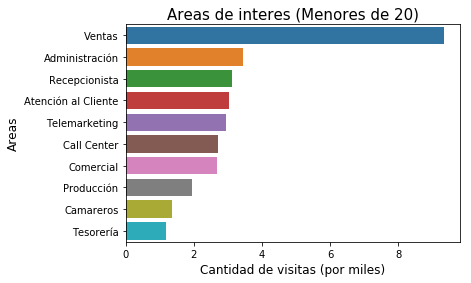

In [36]:
vistas_rango_1 = pd.merge(rango_1, ade, left_on='idAviso', right_on='idaviso')
g = sns.barplot(x=vistas_rango_1["nombre_area"].value_counts().head(10) / 1000, y=vistas_rango_1["nombre_area"].value_counts().head(10).index, orient='h')
g.set_title("Areas de interes (Menores de 20)", fontsize=15)
g.set_xlabel("Cantidad de visitas (por miles)", fontsize=12)
g.set_ylabel("Areas", fontsize=12)

Text(0,0.5,'Areas')

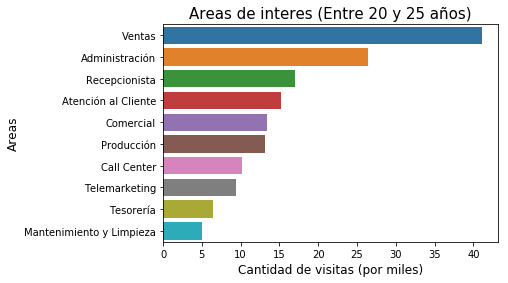

In [37]:
vistas_rango_2 = pd.merge(rango_2, ade, left_on='idAviso', right_on='idaviso')
g = sns.barplot(x=vistas_rango_2["nombre_area"].value_counts().head(10) / 1000, y=vistas_rango_2["nombre_area"].value_counts().head(10).index, orient='h')
g.set_title(u"Areas de interes (Entre 20 y 25 años)", fontsize=15)
g.set_xlabel("Cantidad de visitas (por miles)", fontsize=12)
g.set_ylabel("Areas", fontsize=12)

Text(0,0.5,'Areas')

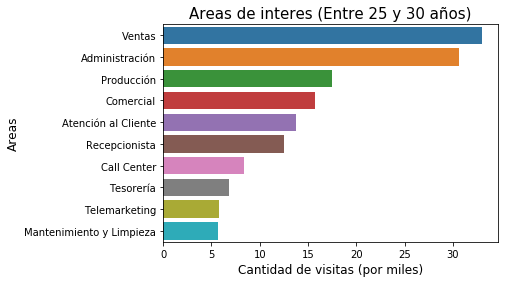

In [38]:
vistas_rango_3 = pd.merge(rango_3, ade, left_on='idAviso', right_on='idaviso')
g = sns.barplot(x=vistas_rango_3["nombre_area"].value_counts().head(10) / 1000, y=vistas_rango_3["nombre_area"].value_counts().head(10).index, orient='h')
g.set_title(u"Areas de interes (Entre 25 y 30 años)", fontsize=15)
g.set_xlabel("Cantidad de visitas (por miles)", fontsize=12)
g.set_ylabel("Areas", fontsize=12)

Text(0,0.5,'Areas')

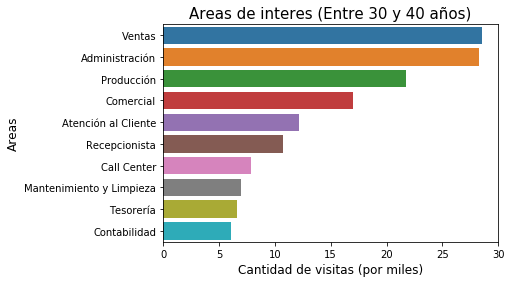

In [39]:
vistas_rango_4 = pd.merge(rango_4, ade, left_on='idAviso', right_on='idaviso')
g = sns.barplot(x=vistas_rango_4["nombre_area"].value_counts().head(10) / 1000, y=vistas_rango_4["nombre_area"].value_counts().head(10).index, orient='h')
g.set_title(u"Areas de interes (Entre 30 y 40 años)", fontsize=15)
g.set_xlabel("Cantidad de visitas (por miles)", fontsize=12)
g.set_ylabel("Areas", fontsize=12)

Se esperaba que algunas áreas relacionadas a nuevas tecnologías tuviesen un mayor interés sobre los jóvenes pero esto no ocurrió así. Es probable que los datos no sean suficientes para asegurar que es lo que buscan los jóvenes, pero nuevamente, es una aproximación.

# Los 10 anuncios cuya tasa de conversión (postulaciones al anuncio sobre visitas totales al anuncio) es la más alta.






In [40]:
postulaciones_anuncio=post.loc[:, ["idaviso"]].groupby("idaviso").size()
vistas_anuncio=vis.loc[:, ["idAviso"]].groupby("idAviso").size()
post_vis=pd.concat([postulaciones_anuncio, vistas_anuncio],axis=1).dropna()
promedio_vistas=vistas_anuncio.sum()/vistas_anuncio.count()
post_vis=post_vis[post_vis[1]>= promedio_vistas]
post_vis["tasa de conversion"]=post_vis[0]/post_vis[1]
tasa_10=post_vis.sort_values("tasa de conversion", ascending=False)
tasa_10=tasa_10.reset_index()
tasa_10.rename(columns={'index':'idaviso'}, inplace = True) 
aviso_10=pd.merge(tasa_10, ade ,on="idaviso",how="inner")
aviso_10.loc[:,["titulo", "nombre_area", "denominacion_empresa"]].head(10)

,titulo,nombre_area,denominacion_empresa
0,Operario de Producción,Producción,EBM Consultores
1,Operario de deposito (Laboratorio),Producción,GI GROUP Argentina
2,Representante de Atención al Cliente - Turno N...,Telemarketing,COMDATA ARGENTINA SA
3,Operario Alimenticio - Morón,Producción,Manpower
4,Personal de Limpieza Z/ CABA,Mantenimiento y Limpieza,Pullmen Servicios Empresarios S.A.
5,Personal de limpieza - Turnos rotativos,Mantenimiento y Limpieza,STEPAKO/PASTEKO SA
6,IMPORTANTE EMPRESA busca Operarios con o sin e...,Producción,Manpower
7,Administrativo de Recepción,Asistente,Coca Cola Andina Argentina
8,"Operadores de Call Center, para Captación de D...",Telemarketing,Aldeas Infantiles SOS Argentina
9,Asesores para Venta Telefónica,Comercial,123Seguro


In [41]:
#como se relaciona el nivel del postulantes y el nivel laboral segun el aviso
nivel_postulante=edu.loc[:, ["idpostulante", "nivel_educativo"]]
nivel_laboral=ade.loc[:, ["idaviso", "nivel_laboral"]]
nivel_postulacion=post.loc[:, ["idaviso", "idpostulante"]]
nivel_datos=pd.merge(nivel_laboral, nivel_postulacion, on="idaviso", how="right")

nivel_datos=pd.merge(nivel_datos, nivel_postulante, on="idpostulante", how="inner" )
dato=nivel_datos.loc[:,["nivel_laboral", "nivel_educativo"]].groupby(["nivel_laboral", "nivel_educativo"]).agg(np.size)
dato=dato.to_frame().reset_index()


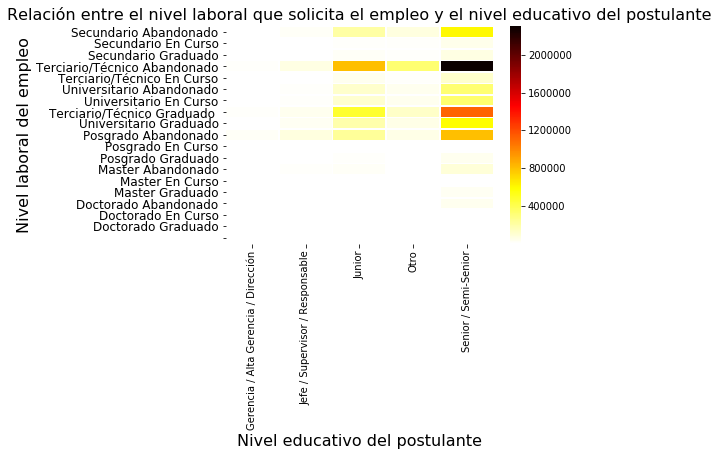

In [42]:
for_heatmap = dato.pivot_table(index="nivel_educativo", columns="nivel_laboral", values=0)
g = sns.heatmap(for_heatmap,  cmap="hot_r", linewidths=0.5)
g.set_title("Relación entre el nivel laboral que solicita el empleo y el nivel educativo del postulante", fontsize=16)
g.set_xlabel("Nivel educativo del postulante",fontsize=16)
g.set_ylabel("Nivel laboral del empleo", fontsize=16);
g.set_yticklabels([r"Secundario Abandonado", r"Secundario En Curso",r"Secundario Graduado",r"Terciario/Técnico Abandonado",r"Terciario/Técnico En Curso",r"Universitario Abandonado" ,r"Universitario En Curso", r"Terciario/Técnico Graduado ", r"Universitario Graduado",r"Posgrado Abandonado", r"Posgrado En Curso", r"Posgrado Graduado",r"Master Abandonado",r"Master En Curso",r"Master Graduado", r"Doctorado Abandonado",r"Doctorado En Curso",r"Doctorado Graduado"],fontsize=12);


se puede observar que el nivel laboral del empleo se relaciona con el nivel educativo ya que los postulantes con el nivel terciario o tecnico abandonado se postulan a empleos senior o semi- senior como los hacen los tecnicos graduados.

In [43]:
#en que horario son vistos los avisos y si eso influye con la cantidad de postulaciones ene se dia, solo hay vistas en febrero
vis.timestamp= pd.to_datetime(vis.timestamp, errors='coerce')

vis["day"]=vis.timestamp.dt.day
vis["weekday"]=vis.timestamp.dt.weekday
vis["time"]=vis.timestamp.dt.time
vis["hour"]=vis.timestamp.dt.hour
vis

,idAviso,timestamp,idpostulante,day,weekday,time,hour
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,23,4,18:38:13.187000,18
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR,23,4,18:38:14.296000,18
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd,23,4,18:38:14.329000,18
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv,23,4,18:38:17.921000,18
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP,23,4,18:38:18.973000,18
5,1112355613,2018-02-23 18:38:23.467,rmdWApz,23,4,18:38:23.467000,18
6,1112346704,2018-02-23 18:38:27.130,Dr6e6Xl,23,4,18:38:27.130000,18
7,1112282610,2018-02-23 18:38:27.670,A3R9GWl,23,4,18:38:27.670000,18
8,1112342544,2018-02-23 18:38:31.601,8M24rbM,23,4,18:38:31.601000,18
9,1112358408,2018-02-23 18:38:32.977,YjrD1ZZ,23,4,18:38:32.977000,18


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


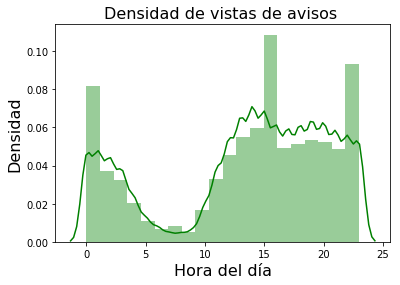

In [46]:

g = sns.distplot(vis["hour"],bins=20, color="green")
g.set_title("Densidad de vistas de avisos ", fontsize=16)
g.set_xlabel("Hora del día",fontsize=16)
g.set_ylabel("Densidad", fontsize=16);


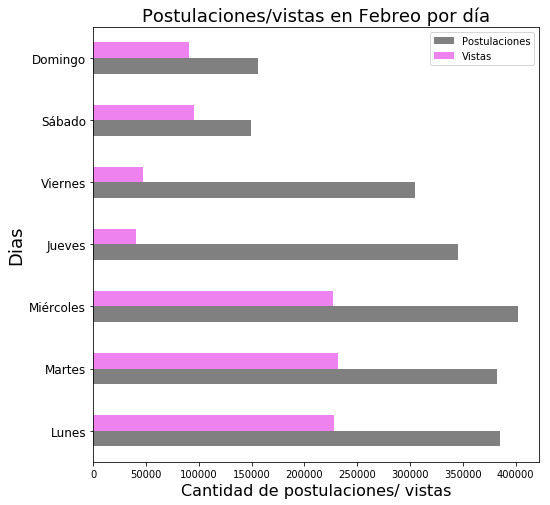

In [50]:
postulaciones=post[post["month"]==2]["weekday_"].value_counts()
vistas=vis["weekday"].value_counts()
ambos=pd.concat([postulaciones, vistas], axis=1).rename(columns={"weekday_":"Postulaciones", "weekday":"Vistas"})
g=ambos.plot(kind="barh", figsize=(8,8), color=["grey","violet"] );

plt.ylabel('Dias', fontsize=18)

plt.title("Postulaciones/vistas en Febreo por día",fontsize=18);

g.set_xlabel("Cantidad de postulaciones/ vistas", fontsize=16);
g.set_yticklabels([r'Lunes', r'Martes', r'Miércoles', r'Jueves', r'Viernes', r"Sábado", r"Domingo"], fontsize=12);


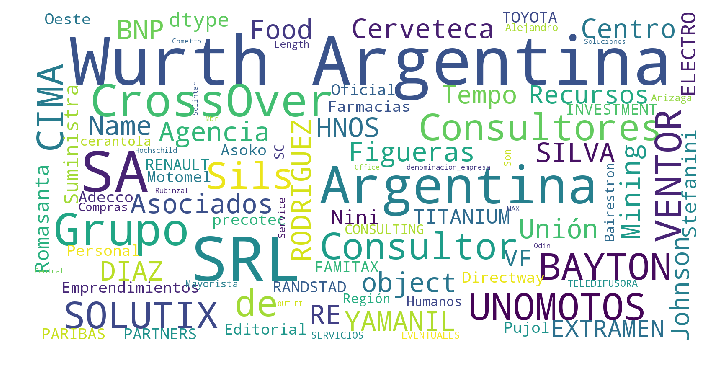

In [73]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=13533,
        max_font_size=40, 
        scale=4,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(ade["denominacion_empresa"])